<a href="https://colab.research.google.com/github/cesaralejon/sales-predictions/blob/main/Proyecto1_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto - Sales Predictions

Continuaremos trabajando con el repositorio GitHub que creaste la semana pasada para tu primer proyecto de portafolio. El objetivo de tus proyectos de portafolio es tener elementos para mostrarle a potenciales empleadores que demuestren tus habilidades y competencias en la ciencia de datos.

El primer proyecto será una predicción de ventas para productos alimenticios que se venden en distintas tiendas. El objetivo es ayudar a la tienda a comprender las propiedades de los productos y establecimientos que tienen un rol crucial en aumentar las ventas.

Para la parte 2, tu tarea es importar los datos y usar Pandas para comenzar a limpiar y explorar los datos. En la ciencia de datos, pasaremos cerca del 80% de nuestro tiempo preparando los datos, ¡así que este es un paso muy importante! Primero, clona el repositorio GitHub que creaste para alojar tu proyecto, para que puedas asignarle este repositorio a tu trabajo. Ve el video al final de esta tarea si no tienes seguridad de cómo hacerlo.

* Descarga los datos usando este enlace:  descarga los datos. (Nota: Fuente original de los datos)

* Explora los datos: ¿Qué necesitas para limpiar estos datos?
¿Hay valores faltantes en el conjunto de datos? Es posible que algunas tiendas no informen de todos los datos a causa de problemas técnicos u otros problemas. De ser así, trata con ello apropiadamente.
Aquí hay algunos recursos para que consideres maneras más avanzadas para lidiar con valores faltantes en tu conjunto de datos (revisa los recursos Pandas adicionales opcionales al final de este capítulo para más recursos sobre esto):
* [Datos faltantes, sus tiopos y métodos estadísticos para lidiar con ellos](https://blog.usejournal.com/missing-data-its-types-and-statistical-methods-to-deal-with-it-5cf8b71a443f)
* [6 formas diferentes de compensar los valores faltantes en un conjunto de dato](https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779)
[
Valores en un conjunto de datos
* [Tratamiento de datos faltantes: Supuestos y métodos clave para el análisis aplicados](http://www.bu.edu/sph/files/2014/05/Marina-tech-report.pdf)




¿Cuáles son algunos resúmenes estadísticos, información agregada, u otras tendencias que puedes observar en los datos usando Pandas?
Aquí hay un diccionario de datos para este conjunto de datos:

Nombre de la variable	Descripción
* Item_Identifier	Número de identificación único del producto
* Item_Weight	Peso del producto
* Item_Fat_Content	Si el producto es bajo en grasas o regular
* Item_Visibility	El porcentaje de área total de visualización de todos los productos en la tienda asignados a este producto particular
* Item_Type	La categoría a la que pertenece el producto
* Item_MRP	Precio Máximo Minorista (precio de lista) del producto
* Outlet_Identifier	Número de identificación único de la tienda
* Outlet_Establishment_Year	El año en el que se estableció la tienda
* Outlet_Size	El tamaño de la tienda en cuanto a la superficie total que cubre
* Outlet_Location_Type	El tipo de área donde se ubica la tienda
* Outlet_Type	Si la tienda es un almacén o algún tipo de supermercado
* Item_Outlet_Sales	Las ventas del producto en la tienda particular. **Esta es la variable objetivo que se debe predecir.**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
sp = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Week 2/PTDataScience/PandasForDataManipulation/sales_predictions.csv')
sp.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
sp.shape

(8523, 12)

In [6]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
sp.describe(include=[object])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [8]:
sp.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [9]:
columnas = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type','Outlet_Size', 'Item_MRP', 'Item_Outlet_Sales']
sp = pd.melt(sp, id_vars = columnas)
sp.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Outlet_Size,Item_MRP,Item_Outlet_Sales,variable,value
0,FDA15,9.30,Low Fat,0.016047,Dairy,Medium,249.8092,3735.1380,Outlet_Identifier,OUT049
1,DRC01,5.92,Regular,0.019278,Soft Drinks,Medium,48.2692,443.4228,Outlet_Identifier,OUT018
2,FDN15,17.50,Low Fat,0.016760,Meat,Medium,141.6180,2097.2700,Outlet_Identifier,OUT049
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,NaN,182.0950,732.3800,Outlet_Identifier,OUT010
4,NCD19,8.93,Low Fat,0.000000,Household,High,53.8614,994.7052,Outlet_Identifier,OUT013


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
sp['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [12]:
sp['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [13]:
sp.groupby('Item_Outlet_Sales').sum()

,Item_Weight,Item_Visibility,Item_MRP
Item_Outlet_Sales,,,
33.2900,74.42,0.257643,265.1200
33.9558,0.00,0.537310,140.2232
34.6216,0.00,0.292309,137.2864
35.2874,28.62,1.126038,135.5496
36.6190,61.40,0.192047,279.3520
...,...,...,...
10306.5840,0.00,0.122773,912.1408
10993.6896,0.00,0.355360,1017.0688
11445.1020,0.00,0.000000,1012.1424


In [14]:
sp.groupby('Item_Type').sum()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Type,,,,
Baking Goods,26322.12,179.286825,327578.9456,5.062101e+06
Breads,9259.10,66.520118,141516.4792,2.212949e+06
Breakfast,4545.48,37.718124,62386.7864,9.291958e+05
Canned,26531.10,176.863703,362826.9080,5.776606e+06
Dairy,30396.62,197.581397,405105.8384,6.090376e+06
Frozen Foods,36954.20,224.769298,474235.5256,7.302939e+06
Fruits and Vegetables,53904.16,337.631782,712496.3240,1.128024e+07
Hard Drinks,8345.04,55.590828,117338.7064,1.831174e+06
Health and Hygiene,22604.78,114.849238,272103.3552,4.180801e+06


Text(0, 0.5, 'USD')

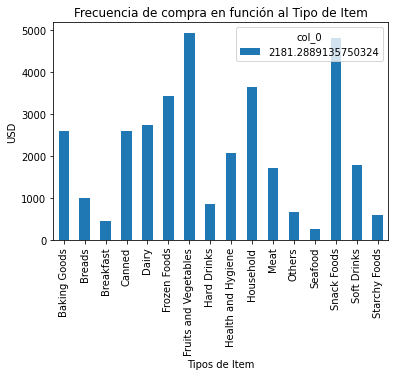

In [17]:
%matplotlib inline
pd.crosstab(sp.Item_Type, sp.Item_Outlet_Sales.mean()).plot(kind="bar")
plt.title("Frecuencia de compra en función al Tipo de Item")
plt.xlabel("Tipos de Item")
plt.ylabel("USD")

Text(0, 0.5, 'USD')

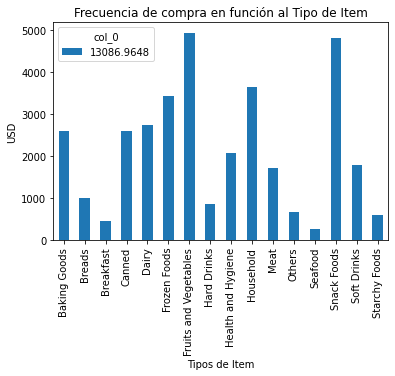

In [18]:
%matplotlib inline
pd.crosstab(sp.Item_Type, sp.Item_Outlet_Sales.max()).plot(kind="bar")
plt.title("Frecuencia de compra en función al Tipo de Item")
plt.xlabel("Tipos de Item")
plt.ylabel("USD")

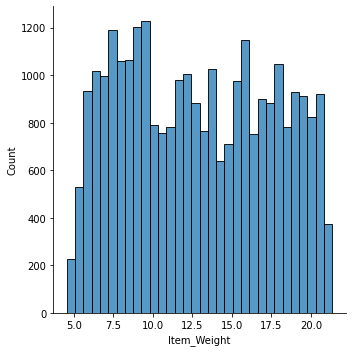

In [20]:
sns.displot(sp.Item_Weight)